### mnist 

In [2]:
from sklearn.datasets import fetch_openml 

In [3]:
mnist=fetch_openml('mnist_784',version=1)

- 데이터셋 불러오기.

In [4]:
X,y=mnist['data'],mnist['target']

- X에는 'data', y에는 'label' 불러오기

In [5]:
X.shape

(70000, 784)

- 하나의 행으로 이루어져 있기 때문에 이미지를 확인하려면 28*28로 바꿔주어야 한다.

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)

- reshape 함수를 사용해서 28*28로 바꿔줬다.

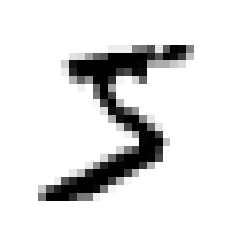

In [8]:
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

- 이미지로 나타내기

In [9]:
y[0]

'5'

- some_digit의 라벨을 확인 해보니 5인 것을 알 수 있다.

#### train set과 test set 분리

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/7,random_state=42)

#### SGD 모델을 사용해서  분류하기

In [16]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,y_train)

SGDClassifier()

#### 성능 평가

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.88205, 0.85895, 0.88275])

- 세 가지 모두 80% 이상으로 나쁘지 않음을 알 수 있다.
- 하지만 SGDClassifier은 선형 모델이기 때문에 픽셀 강도에 대한 가중치의 합을 클래스의 점수로 계산한다. 그래서 모양이 유사한 숫자는 몇몇의 픽셀만 다르기 때문에 모델이 쉽게 혼동할 수 있다.

#### RandomForest Classifer 모델을 사용해서 분류하기

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

#### 성능평가

In [30]:
cross_val_score(rf_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.9665 , 0.96645, 0.96565])

- 확실히 선형모델보다 성능일 좋음을 알 수 있다.

#### 에러 분석

In [32]:
y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5837,    2,    8,    1,    3,   11,   19,    1,   35,    3],
       [   1, 6619,   34,   16,   13,    7,    8,   13,   11,    3],
       [  26,   12, 5814,   28,   25,    4,   23,   48,   37,    6],
       [  10,    6,   79, 5798,    4,   63,    7,   50,   62,   28],
       [  11,    8,   10,    0, 5740,    1,   24,    9,   11,  104],
       [  29,    8,    6,   65,    9, 5154,   44,    8,   30,   23],
       [  25,   12,    7,    1,    7,   34, 5813,    0,   16,    0],
       [   7,   20,   65,    5,   37,    1,    0, 6021,   10,   72],
       [  13,   31,   35,   47,   26,   43,   29,    5, 5566,   61],
       [  25,   12,   18,   77,   75,   17,    4,   49,   35, 5610]],
      dtype=int64)

- 보기 힘들기 때문에 이를 그래픽으로 나타내면

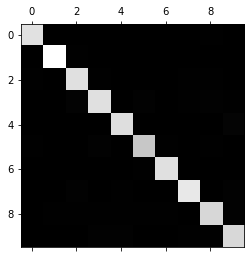

In [33]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

- 주 대각선으로 잘 나온 것을 보아 잘 분류 됐음을 알 수 있다.

In [35]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

- 그래프의 에러에 초점을 맞춰 Confusion Matrix의 각 값을 대응되는 클래스의 이미지 개수로 나누어 에러 비율을 비교해보면

In [37]:
import numpy as np

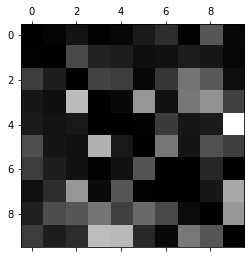

In [38]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

- 에러들이 특정 숫자 대신 다양한 숫자들로 잘못 분류되었음을 알 수 있다.